### Autor: Carlos Eduardo Fontaneli
#### Email: carlos_fontaneli42@gmail.com 
#### Telefone: (19) 9 9772-3769

In [500]:
# Manipulação e visualição dos dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Pré-processamento e métricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Modelo de rede neural
from keras.models import Sequential
from keras.layers import Dense

### Leitura e análise exploratória do dataset

In [501]:
df = pd.read_excel('Dados.xlsx')
df

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317
5,2022-12-11,685
6,2022-12-12,1366
7,2022-12-13,1213
8,2022-12-14,1055
9,2022-12-15,1343


In [502]:
# Vendo como se dão os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [503]:
df.describe()

,Vendas
count,46.000000
mean,755.434783
std,430.762201
min,18.000000
25%,346.500000
50%,810.500000
75%,1053.750000
max,1692.000000


### Aumento de dimensionalidade

Como o dataset é muito pequeno, possuindo apenas 2 colunas e 50 linhas, optou-se por criar mais dimensões de dados para alimentar o modelo preditivo. Dessa forma, converteu-se o atributo data para anos, meses, dias, horas, minutos e segundos. 

In [504]:
years = []
months = []
days = []
hours = []
minutes = []
seconds = [] 


for index, row in df.iterrows():
  # Retirando o ano do exemplo
  years.append(row['Data'].year)
  # Retirando o mes do exemplo
  months.append(row['Data'].month)
  # Retirando o dia do exemplo
  days.append(row['Data'].day)  
  
  # Convertendo a data para horas
  hours.append((row['Data'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'h'))
  # Convertendo a data para minutos
  minutes.append((row['Data'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'm'))
  # Convertendo a data para segundos
  seconds.append((row['Data'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's'))
  

df['Qtde_dia'] = range(46)
df['Ano'] = years
df['Mes'] = months
df['Dia'] = days
df['Horas'] = hours
df['Minutos'] = minutes
df['Segundos'] = seconds

# Dataset final
df.head()

/tmp/ipykernel_3574/1363730068.py:18: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  hours.append((row['Data'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'h'))
/tmp/ipykernel_3574/1363730068.py:20: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  minutes.append((row['Data'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'm'))
/tmp/ipykernel_3574/1363730068.py:22: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  seconds.append((row['Data'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's'))


,Data,Vendas,Qtde_dia,Ano,Mes,Dia,Horas,Minutos,Segundos
0,2022-12-06,870,0,2022,12,6,463968.0,27838080.0,1.670285e+09
1,2022-12-07,868,1,2022,12,7,463992.0,27839520.0,1.670371e+09
2,2022-12-08,1189,2,2022,12,8,464016.0,27840960.0,1.670458e+09
3,2022-12-09,742,3,2022,12,9,464040.0,27842400.0,1.670544e+09
4,2022-12-10,317,4,2022,12,10,464064.0,27843840.0,1.670630e+09


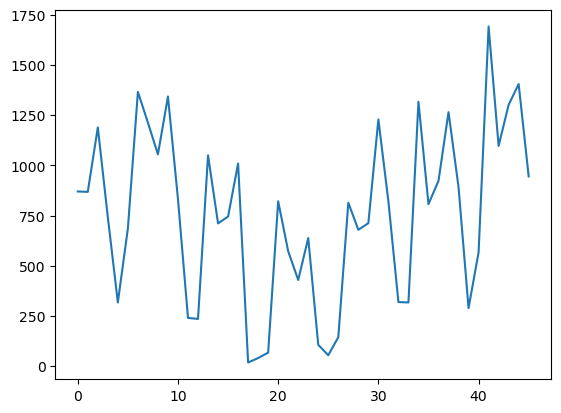

In [505]:
# Analisando o comportamento das vendas ao longo dos dias
plt.plot(df['Qtde_dia'], df['Vendas'])

### Escolha do modelo

Dado o comportamento muito variado dos dados, o tamanho reduzido do dataset e a dimensionalidae pequena, optou-se pelo uso de uma rede neural artificial para tentar prever o comportamento das vendas.

### Preparando os dados

In [506]:
y = df['Vendas'] # Target
X = df.drop(['Vendas', 'Data'], axis=1) # Atributos

# Convertendo para numpy array para uso no modelo
X = np.array(X)
y = np.array(y)


# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #10% 5 casos
                                                    random_state=123)

# Normalizando os dados, dado que as escalas dos atributos são muito diferentes 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Exibindo como ficou os dados que serão usados no modelo
pd.DataFrame(X_train, columns=df.drop(['Vendas', 'Data'], axis=1).columns)

,Qtde_dia,Ano,Mes,Dia,Horas,Minutos,Segundos
0,0.133333,0.0,1.0,0.366667,0.133333,0.133333,0.133333
1,0.822222,1.0,0.0,0.366667,0.822222,0.822222,0.822222
2,0.266667,0.0,1.0,0.566667,0.266667,0.266667,0.266667
3,0.911111,1.0,0.0,0.500000,0.911111,0.911111,0.911111
4,0.777778,1.0,0.0,0.300000,0.777778,0.777778,0.777778
5,0.688889,1.0,0.0,0.166667,0.688889,0.688889,0.688889
6,0.577778,1.0,0.0,0.000000,0.577778,0.577778,0.577778
7,0.333333,0.0,1.0,0.666667,0.333333,0.333333,0.333333
8,0.466667,0.0,1.0,0.866667,0.466667,0.466667,0.466667
9,0.155556,0.0,1.0,0.400000,0.155556,0.155556,0.155556


### Rede neural artificial

Para o modelo de regresão baseado em rede neural utilizou-se o modelo sequencial da bibliotecas *keras* do framework de deep learning *tensorflow*. 

### Parâmetros do modelo final

Após diversos testes com quantidades diferentes de neurônios, diferentes funções de ativações e diferentes épocas, foram configuradas 4 camadas escondidas de neurônios, cada uma contando com uma quantidade decrescente de neurônios e como função de ativação a função *relu*, com o treinamento feito em 1000 épocas.

In [507]:
# Importando o modelo
model = Sequential()

# Adicionando as camadas de neurônios
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # Camada de saída

# Modelo final
model.summary() 

# Compilando o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_336 (Dense)           (None, 1000)              8000      
                                                                 
 dense_337 (Dense)           (None, 500)               500500    
                                                                 
 dense_338 (Dense)           (None, 250)               125250    
                                                                 
 dense_339 (Dense)           (None, 1)                 251       
                                                                 
Total params: 634,001
Trainable params: 634,001
Non-trainable params: 0
_________________________________________________________________


### Treinamento do modelo

In [508]:
# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=1000,
                    verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 86ms/step - loss: 784096.6875 - mae: 773.0909 - val_loss: 636546.8125 - val_mae: 691.2687
Epoch 2/1000
2/2 [==============================] - 0s 19ms/step - loss: 782737.7500 - mae: 772.2542 - val_loss: 635391.8750 - val_mae: 690.4034
Epoch 3/1000
2/2 [==============================] - 0s 20ms/step - loss: 781096.3750 - mae: 771.1748 - val_loss: 633589.8750 - val_mae: 689.0506
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 778421.6875 - mae: 769.4670 - val_loss: 630760.6875 - val_mae: 686.9240
Epoch 5/1000
2/2 [==============================] - 0s 19ms/step - loss: 774281.0625 - mae: 766.7852 - val_loss: 626551.1250 - val_mae: 683.7419
Epoch 6/1000
2/2 [==============================] - 0s 20ms/step - loss: 767996.0000 - mae: 762.7275 - val_loss: 620507.8750 - val_mae: 679.1412
Epoch 7/1000
2/2 [==============================] - 0s 22ms/step - loss: 759092.1250 - mae: 756.9470 - val_loss: 612114.1875 - val

### Resultados do treinamento

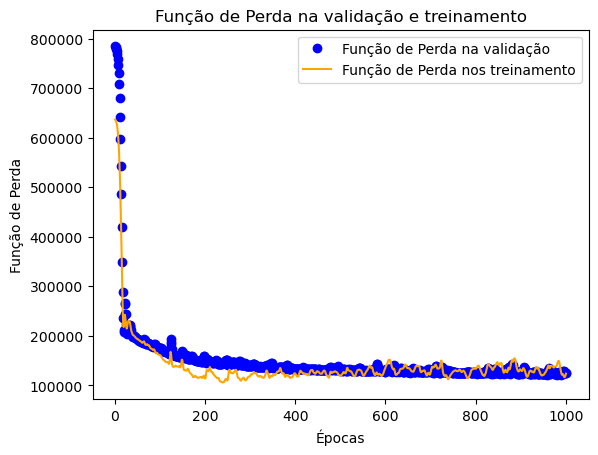

In [509]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Função de Perda na validação')
plt.plot(epochs, val_loss_values, 'orange', label='Função de Perda nos treinamento')
plt.title('Função de Perda na validação e treinamento')
plt.xlabel('Épocas')
plt.ylabel('Função de Perda')
plt.legend()
plt.show()

In [510]:
# Testando o modelo
prediction = model.predict(X_test)
prediction

trainpredictions = model.predict(X_train)

print(f'Erro absoluto médio - Treinamento: {mean_absolute_error(y_train, trainpredictions)}')
print(f'Erro absoluto médio - Teste: {mean_absolute_error(y_test, prediction)}')

2/2 [==============================] - 0s 2ms/step
Erro absoluto médio - Treinamento: 294.1288062201606
Erro absoluto médio - Teste: 305.00568237304685


### Criação do dataset da previsão final

In [511]:
next_five_days = []
years = []
months = []
days = []
timestamp = []
hours = []
minutes = []
seconds = [] 

# Criando os novos dados
for i in range(21, 26):
  date = pd.to_datetime(datetime.date(2023, 1, i))
  next_five_days.append(date)
  years.append(date.year)
  months.append(date.month)
  days.append(date.day)  
  hours.append((date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'h'))
  minutes.append((date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'm'))
  seconds.append((date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's'))

prevision_df = pd.DataFrame()
prevision_df['Data'] = next_five_days
prevision_df['Qtde_dia'] = range(46, 51)
prevision_df['Ano'] = years
prevision_df['Mes'] = months
prevision_df['Dia'] = days
prevision_df['Horas'] = hours
prevision_df['Minutos'] = minutes
prevision_df['Segundos'] = seconds

# Dataset da previsao
prevision_df

/tmp/ipykernel_3574/3178005217.py:17: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  hours.append((date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'h'))
/tmp/ipykernel_3574/3178005217.py:18: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  minutes.append((date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'm'))
/tmp/ipykernel_3574/3178005217.py:19: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  seconds.append((date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's'))


,Data,Qtde_dia,Ano,Mes,Dia,Horas,Minutos,Segundos
0,2023-01-21,46,2023,1,21,465072.0,27904320.0,1.674259e+09
1,2023-01-22,47,2023,1,22,465096.0,27905760.0,1.674346e+09
2,2023-01-23,48,2023,1,23,465120.0,27907200.0,1.674432e+09
3,2023-01-24,49,2023,1,24,465144.0,27908640.0,1.674518e+09
4,2023-01-25,50,2023,1,25,465168.0,27910080.0,1.674605e+09


### Preparando os dados da previsão final para o modelo

In [512]:
X_prevision = prevision_df.drop(['Data'], axis=1)
X_prevision = np.array(X_prevision)

# Normalizando os dados
X_prevision = min_max_scaler.transform(X_prevision)

pd.DataFrame(X_prevision, columns=prevision_df.drop(['Data'], axis=1).columns)

,Qtde_dia,Ano,Mes,Dia,Horas,Minutos,Segundos
0,1.022222,1.0,0.0,0.666667,1.022222,1.022222,1.022222
1,1.044444,1.0,0.0,0.700000,1.044444,1.044444,1.044444
2,1.066667,1.0,0.0,0.733333,1.066667,1.066667,1.066667
3,1.088889,1.0,0.0,0.766667,1.088889,1.088889,1.088889
4,1.111111,1.0,0.0,0.800000,1.111111,1.111111,1.111111


### Previsão final

In [513]:
final_prediction = model.predict(X_prevision)
final_prediction

1/1 [==============================] - 0s 14ms/step


array([[1347.9675],
       [1391.5446],
       [1435.1193],
       [1478.6934],
       [1522.2671]], dtype=float32)

### Dataset da previsão com as estimativas de venda

In [514]:
prevision_df['Vendas'] = final_prediction
prevision_df

,Data,Qtde_dia,Ano,Mes,Dia,Horas,Minutos,Segundos,Vendas
0,2023-01-21,46,2023,1,21,465072.0,27904320.0,1.674259e+09,1347.967529
1,2023-01-22,47,2023,1,22,465096.0,27905760.0,1.674346e+09,1391.544556
2,2023-01-23,48,2023,1,23,465120.0,27907200.0,1.674432e+09,1435.119263
3,2023-01-24,49,2023,1,24,465144.0,27908640.0,1.674518e+09,1478.693359
4,2023-01-25,50,2023,1,25,465168.0,27910080.0,1.674605e+09,1522.267090


### Plotando a previsão de venda junto com os demais dados

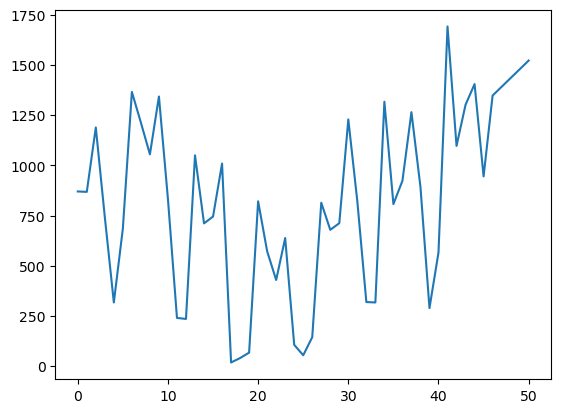

In [515]:
plt.plot(
  pd.concat([df['Qtde_dia'], prevision_df['Qtde_dia']]), 
  pd.concat([df['Vendas'], prevision_df['Vendas']]))
